# Projekt 2 Inzynieria cech i modelowanie

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [ ]:
data=pd.read_csv("drive/MyDrive/online_shoppers_intention.csv")

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


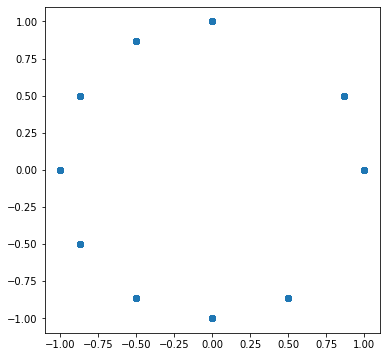

In [ ]:
# enc = OneHotEncoder()
# enc_df = pd.DataFrame(enc.fit_transform(data[['Month']]).toarray(),columns=enc.categories_[0])
# data = data.join(enc_df)
# data=data.drop('Month',axis=1)
months = {"Feb":2, "Mar":3, "May":5, "June":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
data['Month'] = data['Month'].map(months)
data['month_sin'] = np.sin(2 * np.pi * data['Month']/12.0)
data['month_cos'] = np.cos(2 * np.pi * data['Month']/12.0)
data=data.drop('Month',axis=1)
plt.figure(figsize=(6,6))
plt.scatter(data['month_sin'],data['month_cos'])

In [ ]:
# enc_df = pd.DataFrame(enc.fit_transform(data[['OperatingSystems']]).toarray(),columns=list(map(lambda x:'os'+str(x), enc.categories_[0])))
# data = data.join(enc_df)
# data=data.drop('OperatingSystems',axis=1)

In [ ]:
# enc_df = pd.DataFrame(enc.fit_transform(data[['Browser']]).toarray(),columns=list(map(lambda x:'br'+str(x), enc.categories_[0])))
# data = data.join(enc_df)
# data=data.drop('Browser',axis=1)

In [ ]:
# enc_df = pd.DataFrame(enc.fit_transform(data[['Region']]).toarray(),columns=list(map(lambda x:'reg'+str(x), enc.categories_[0])))
# data = data.join(enc_df)
# data=data.drop('Region',axis=1)

In [ ]:
# enc_df = pd.DataFrame(enc.fit_transform(data[['TrafficType']]).toarray(),columns=list(map(lambda x:'traftype'+str(x), enc.categories_[0])))
# data = data.join(enc_df)
# data=data.drop('TrafficType',axis=1)

In [ ]:
enc_df = pd.DataFrame(enc.fit_transform(data[['VisitorType']]).toarray(),columns=enc.categories_[0])
data = data.join(enc_df)
data=data.drop('VisitorType',axis=1)

In [ ]:
le=LabelEncoder()
data['Weekend']=le.fit_transform(data['Weekend'])
data['Revenue']=le.fit_transform(data['Revenue'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  Weekend               

In [ ]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data)
features = range(pca.n_components_)
# plt.bar(features, pca.explained_variance_)
# plt.xlabel('PCA feature')
# plt.ylabel('variance')
# plt.xticks(features)
# plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

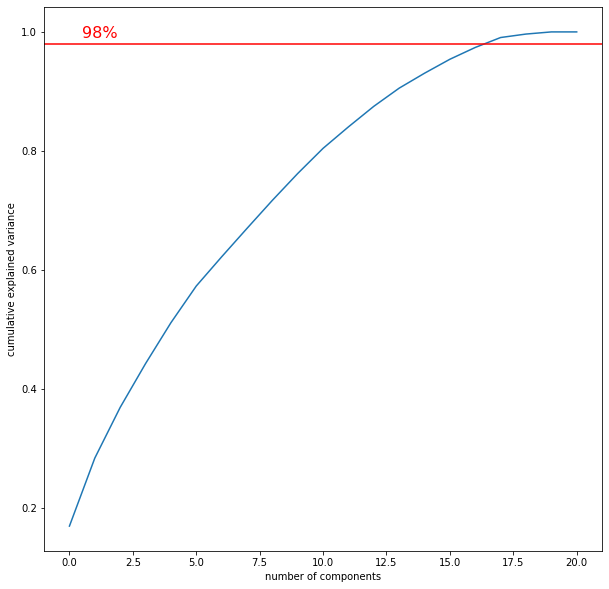

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.axhline(y=0.98, color='r', linestyle='-')
plt.text(0.5, 0.99, '98%', color = 'red', fontsize=16)
plt.ylabel('cumulative explained variance');

In [ ]:
pca.n_components=17
pipeline = make_pipeline(scaler,pca)
new_data=pipeline.fit_transform(data)
new_data

array([[-3.4229031 ,  2.17196229, -0.28825822, ...,  0.10066207,
        -0.04473001, -0.14664208],
       [-1.60894836,  0.42552698, -0.29538869, ...,  0.02573818,
        -0.09025991,  0.15897003],
       [-3.58443434,  1.75433787,  2.15681031, ..., -0.12014851,
        -0.14231998, -0.07093006],
       ...,
       [-1.72930693,  0.78397332,  0.74703817, ..., -0.25724486,
         0.16638131,  0.13262699],
       [-0.16404029,  0.15430301,  0.04190103, ..., -0.17231881,
         0.11387292, -0.23980991],
       [-0.9390487 , -2.94576487, -0.75677628, ..., -0.14070828,
         0.1868947 ,  0.23328125]])

## KMeans

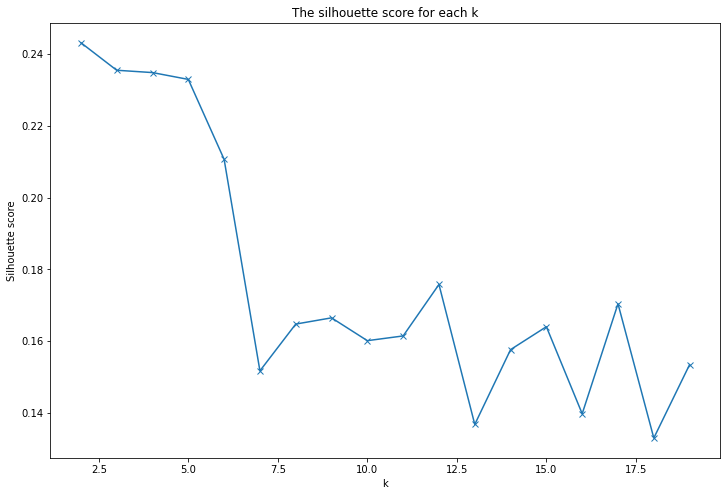

In [ ]:
scores = []
for i in range(2, 20):
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(new_data)
    scores.append(silhouette_score(new_data, y_pred))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The silhouette score for each k')
plt.show()

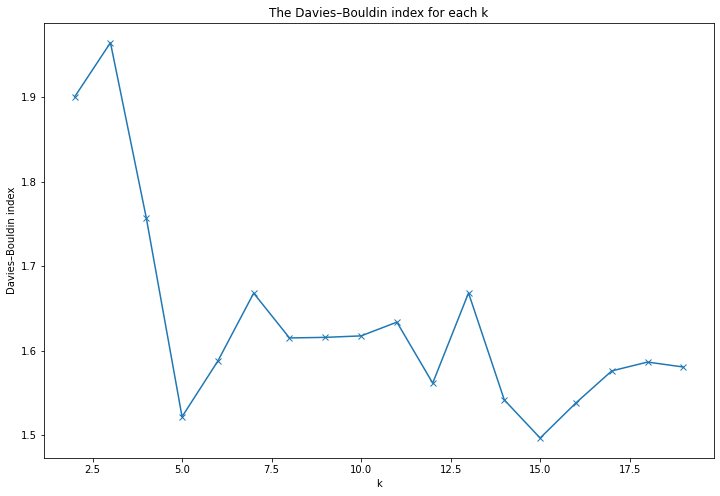

In [ ]:
scores = []
for i in range(2, 20):
    model = KMeans(n_clusters=i)
    model.fit(new_data)
    y_pred = model.fit_predict(new_data)
    scores.append(davies_bouldin_score(new_data,y_pred))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin index')
plt.title('The Davies–Bouldin index for each k')
plt.show()

In [ ]:
model = KMeans(n_clusters=5)
y_pred = model.fit_predict(new_data)

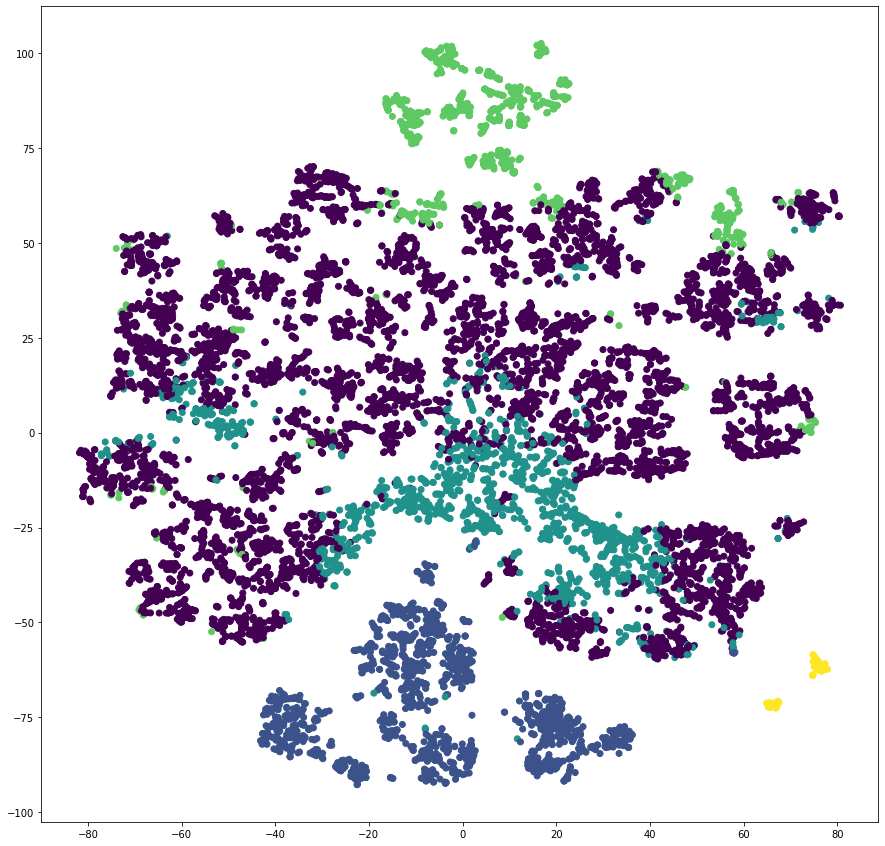

In [ ]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(new_data)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.figure(figsize=(15,15))
plt.scatter(xs,ys, c=y_pred)
plt.show()

In [ ]:
import plotly.express as px
model = TSNE(learning_rate=200,n_components=3)
tsne_features = model.fit_transform(new_data)
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(*zip(*tsne_features),c=y_pred)
fig = px.scatter_3d(
    tsne_features,x=0,y=1,z=2,color=y_pred)
fig.show()

## KMedoids

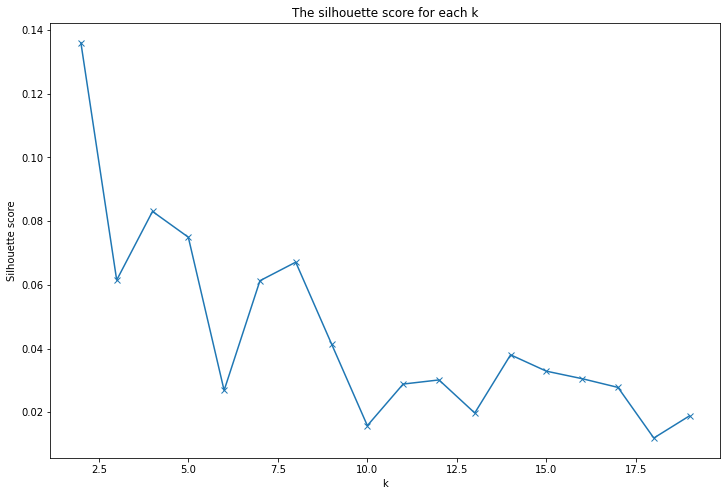

In [ ]:
scores = []
for i in range(2, 20):
    model = KMedoids(n_clusters=i)
    model.fit(new_data)
    labels=model.labels_
    scores.append(silhouette_score(new_data, labels))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The silhouette score for each k')
plt.show()

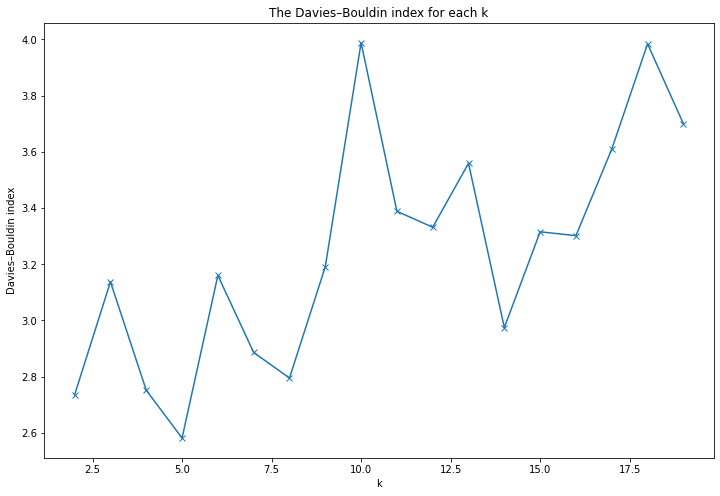

In [ ]:
scores = []
for i in range(2, 20):
    model = KMedoids(n_clusters=i)
    model.fit(new_data)
    labels=model.labels_
    scores.append(davies_bouldin_score(new_data,labels))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin index')
plt.title('The Davies–Bouldin index for each k')
plt.show()

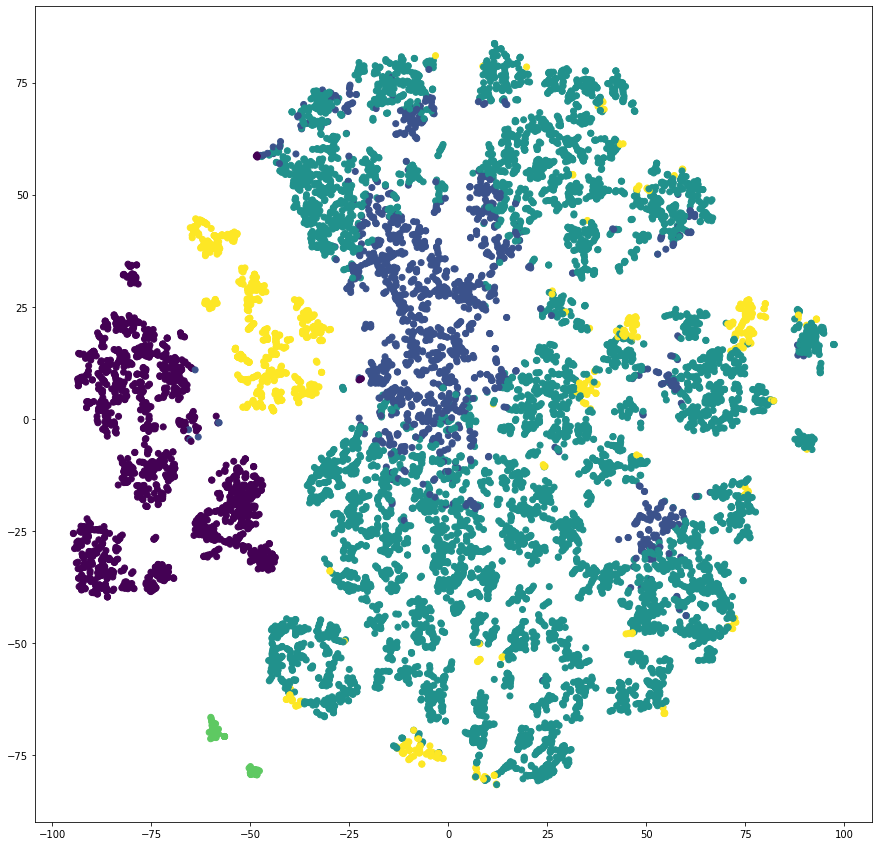

In [ ]:
model = KMeans(n_clusters=5)
y_pred = model.fit_predict(new_data)
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(new_data)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.figure(figsize=(15,15))
plt.scatter(xs,ys, c=y_pred)
plt.show()

In [ ]:
model = TSNE(learning_rate=200,n_components=3)
tsne_features = model.fit_transform(new_data)
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(*zip(*tsne_features),c=y_pred)
fig = px.scatter_3d(
    tsne_features,x=0,y=1,z=2,color=y_pred)
fig.show()

## LOG

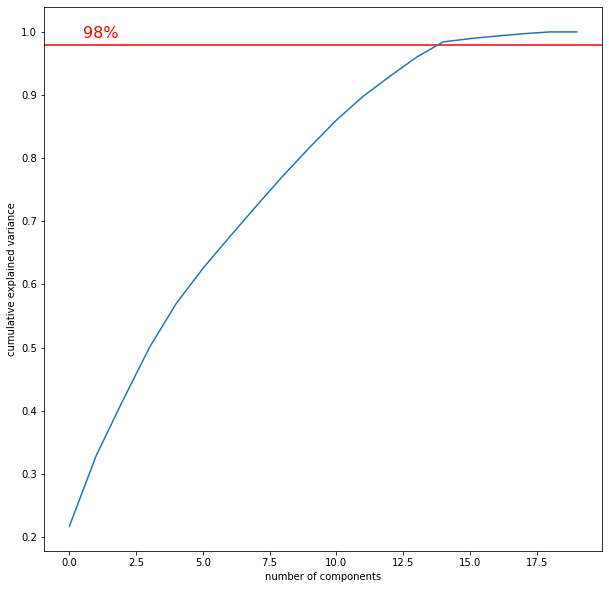

In [ ]:
data=pd.read_csv("drive/MyDrive/online_shoppers_intention.csv")
enc = OneHotEncoder()
le=LabelEncoder()
data['Month']=le.fit_transform(data['Month'])
data['month_sin'] = np.sin(2 * np.pi * data['Month']/12.0)
data['month_cos'] = np.cos(2 * np.pi * data['Month']/12.0)
data=data.drop('Month',axis=1)
enc_df = pd.DataFrame(enc.fit_transform(data[['VisitorType']]).toarray(),columns=enc.categories_[0])
data = data.join(enc_df)
data=data.drop('VisitorType',axis=1)
data=data.drop('Revenue',axis=1)
le=LabelEncoder()
data['Weekend']=le.fit_transform(data['Weekend'])
# data['Revenue']=le.fit_transform(data['Revenue'])
data[['Administrative', 	'Administrative_Duration', 	'Informational', 	'Informational_Duration',
      'ProductRelated', 	'ProductRelated_Duration']]=np.log(1+data[['Administrative', 	'Administrative_Duration', 	'Informational', 	'Informational_Duration',
      'ProductRelated', 	'ProductRelated_Duration']])
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data)
plt.figure(figsize=(10,10))
plt.axhline(y=0.98, color='r', linestyle='-')
plt.text(0.5, 0.99, '98%', color = 'red', fontsize=16)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
pca.n_components=14
pipeline = make_pipeline(scaler,pca)
new_data=pipeline.fit_transform(data)

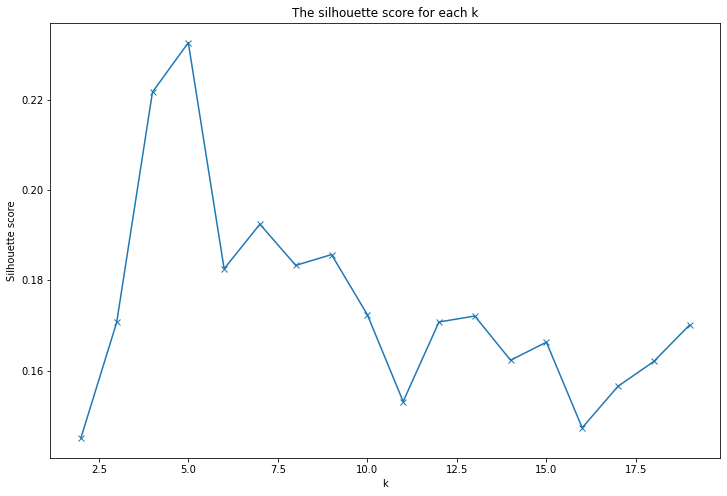

In [ ]:
scores = []
for i in range(2, 20):
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(new_data)
    scores.append(silhouette_score(new_data, y_pred))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The silhouette score for each k')
plt.show()

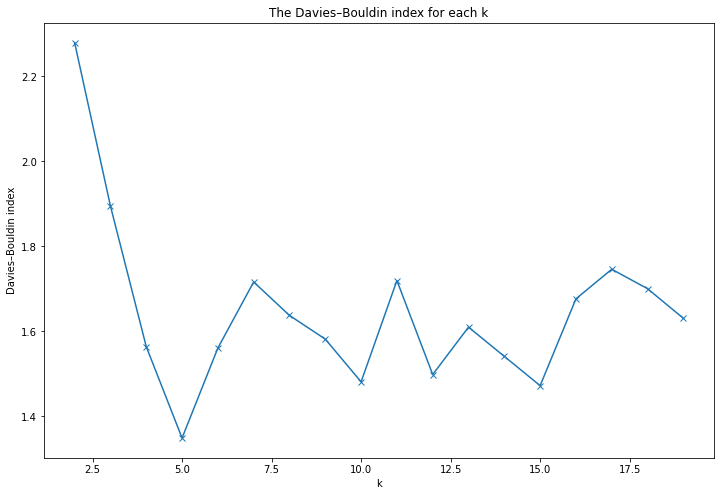

In [ ]:
scores = []
for i in range(2, 20):
    model = KMeans(n_clusters=i)
    model.fit(new_data)
    y_pred = model.fit_predict(new_data)
    scores.append(davies_bouldin_score(new_data,y_pred))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin index')
plt.title('The Davies–Bouldin index for each k')
plt.show()

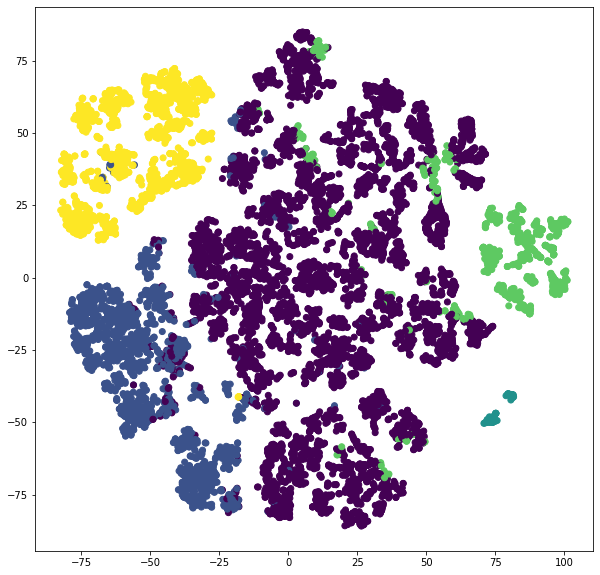

In [ ]:
model = KMeans(n_clusters=5)
y_pred = model.fit_predict(new_data)
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(new_data)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.figure(figsize=(10,10))
plt.scatter(xs,ys, c=y_pred)
plt.show()

In [ ]:
model = TSNE(learning_rate=200,n_components=3)
tsne_features = model.fit_transform(new_data)
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(*zip(*tsne_features),c=y_pred)
fig = px.scatter_3d(
    tsne_features,x=0,y=1,z=2,color=y_pred)
fig.show()

In [ ]:
from scipy.spatial import distance
import numpy as np
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num

    scores = []
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)

    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores


def min_interclust_dist(X, label):
    clusters = set(label)
    global_min_dist = np.inf
    for cluster_i in clusters:
        cluster_i_idx = np.where(label == cluster_i)
        for cluster_j in clusters:
            if cluster_i != cluster_j:
                cluster_j_idx = np.where(label == cluster_j)
                interclust_min_dist = np.min(distance.cdist(X[cluster_i_idx], X[cluster_j_idx]))
                global_min_dist = np.min([global_min_dist, interclust_min_dist])
    return global_min_dist

def _inclust_mean_dists(X, label):
    clusters = set(label)
    inclust_dist_list = []
    for cluster_i in clusters:
        cluster_i_idx = np.where(label == cluster_i)
        inclust_dist = np.mean(distance.pdist(X[cluster_i_idx]))
        inclust_dist_list.append(inclust_dist)
    return inclust_dist_list

def mean_inclust_dist(X, label):
    inclust_dist_list = _inclust_mean_dists(X, label)
    return np.mean(inclust_dist_list)

def std_dev_of_inclust_dist(X, label):
    inclust_dist_list = _inclust_mean_dists(X, label)
    return np.std(inclust_dist_list)

def mean_dist_to_center(X, label):
    clusters = set(label)
    inclust_dist_list = []
    for cluster_i in clusters:
        cluster_i_idx = np.where(label == cluster_i)
        cluster_i_mean = np.mean(X[cluster_i_idx], axis=0, keepdims=True)
        inclust_dist = np.mean(distance.cdist(X[cluster_i_idx], cluster_i_mean))
        inclust_dist_list.append(inclust_dist)
    return np.mean(inclust_dist_list)


print(f'Minimal distance between clusters = {count_clustering_scores(new_data, 5, KMeans, min_interclust_dist):.2f}.')
print(f'Average distance between points in the same class = '
      f'{count_clustering_scores(new_data, 5, KMeans, mean_inclust_dist):.2f}.')
print(f'Standard deviation of distance between points in the same class = '
      f'{count_clustering_scores(new_data, 5, KMeans, std_dev_of_inclust_dist):.3f}.')
print(f'Average distance to cluster center = '
      f'{count_clustering_scores(new_data, 5, KMeans, mean_dist_to_center):.2f}.')

Minimal distance between clusters = 0.21.
Average distance between points in the same class = 5.34.
Standard deviation of distance between points in the same class = 1.595.
Average distance to cluster center = 3.21.


In [ ]:
data['predicted']=y_pred
data['Revenue']=pd.read_csv("drive/MyDrive/online_shoppers_intention.csv")['Revenue']

In [ ]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,month_sin,month_cos,New_Visitor,Other,Returning_Visitor,predicted,Revenue
0,0.000000,0.000000,0.0,0.0,0.693147,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,0.866025,0.500000,0.0,0.0,1.0,3,False
1,0.000000,0.000000,0.0,0.0,1.098612,4.174387,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,0.866025,0.500000,0.0,0.0,1.0,0,False
2,0.000000,0.000000,0.0,0.0,0.693147,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,0.866025,0.500000,0.0,0.0,1.0,3,False
3,0.000000,0.000000,0.0,0.0,1.098612,1.299283,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,0.866025,0.500000,0.0,0.0,1.0,3,False
4,0.000000,0.000000,0.0,0.0,2.397895,6.443336,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,0.866025,0.500000,0.0,0.0,1.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1.386294,4.983607,0.0,0.0,3.988984,7.487057,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,0.500000,0.866025,0.0,0.0,1.0,0,False
12326,0.000000,0.000000,0.0,0.0,1.791759,6.145794,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,-0.500000,-0.866025,0.0,0.0,1.0,0,False
12327,0.000000,0.000000,0.0,0.0,1.945910,5.221706,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,-0.500000,-0.866025,0.0,0.0,1.0,0,False
12328,1.609438,4.330733,0.0,0.0,2.772589,5.849325,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,-0.500000,-0.866025,0.0,0.0,1.0,0,False


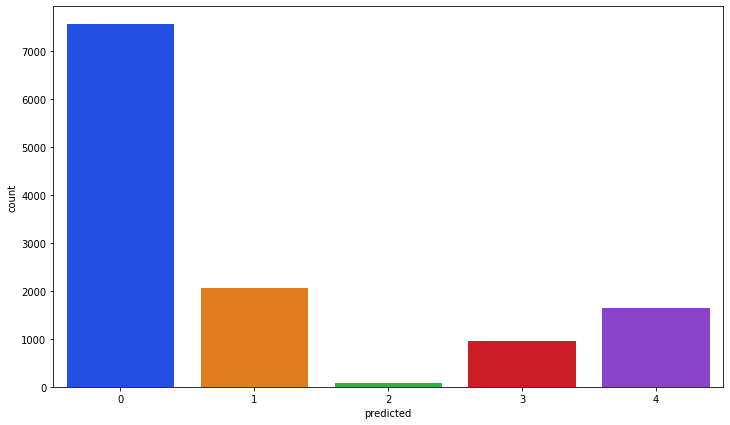

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.countplot(data=data,x="predicted",palette="bright")

In [ ]:
def scaled_countplot(x,y):
  fig=plt.figure(figsize=(12,7))
  (data
  .groupby(x)[y]
  .value_counts(normalize=True)
  .mul(100)
  .rename('percent')
  .reset_index()
  .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',palette="bright"))

<Figure size 864x504 with 0 Axes>

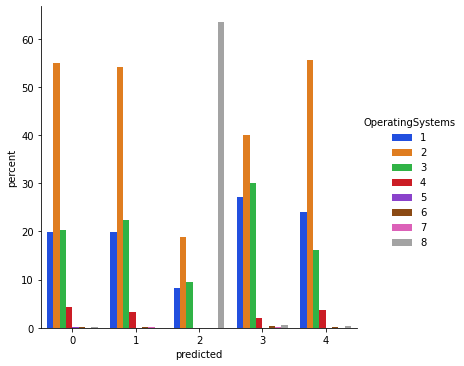

In [ ]:
x="predicted"
y="OperatingSystems"
scaled_countplot(x,y)

<Figure size 864x504 with 0 Axes>

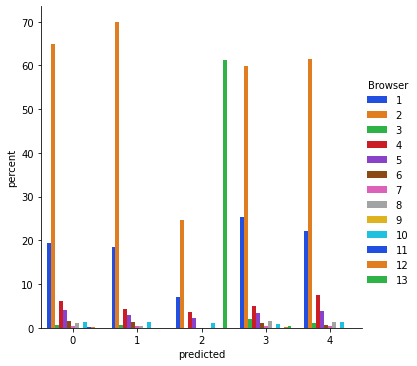

In [ ]:
x="predicted"
y="Browser"
scaled_countplot(x,y)

<Figure size 864x504 with 0 Axes>

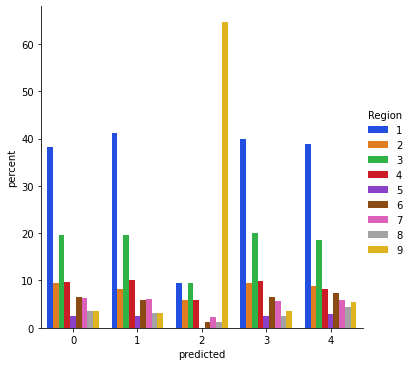

In [ ]:
x="predicted"
y="Region"
scaled_countplot(x,y)

<Figure size 864x504 with 0 Axes>

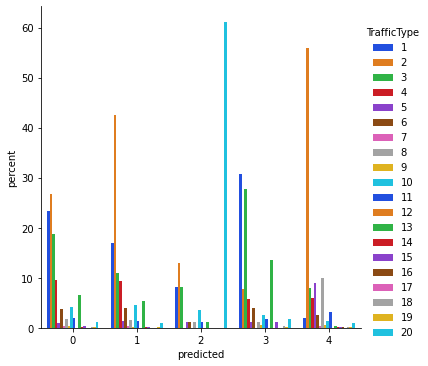

In [ ]:
x="predicted"
y="TrafficType"
scaled_countplot(x,y)

<Figure size 864x504 with 0 Axes>

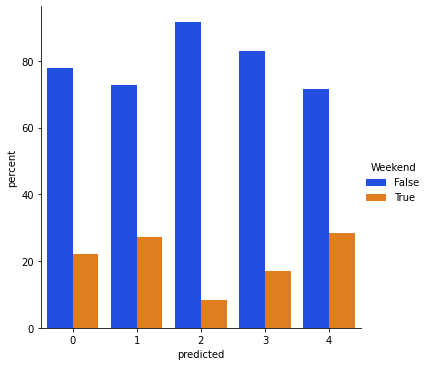

In [ ]:
x="predicted"
y="Weekend"
scaled_countplot(x,y)

<Figure size 864x504 with 0 Axes>

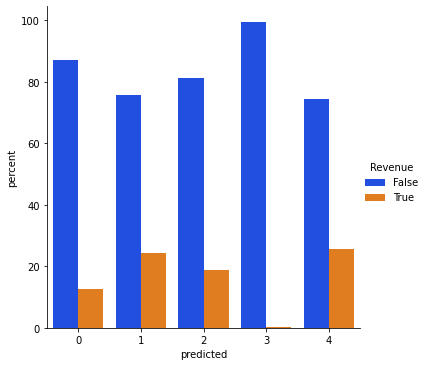

In [ ]:
x="predicted"
y="Revenue"
scaled_countplot(x,y)

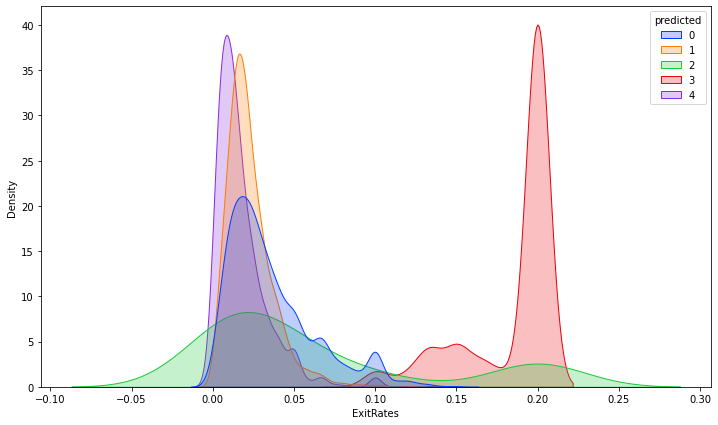

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.kdeplot(data=data,x="ExitRates",hue='predicted',palette="bright",fill=True,common_norm=False)

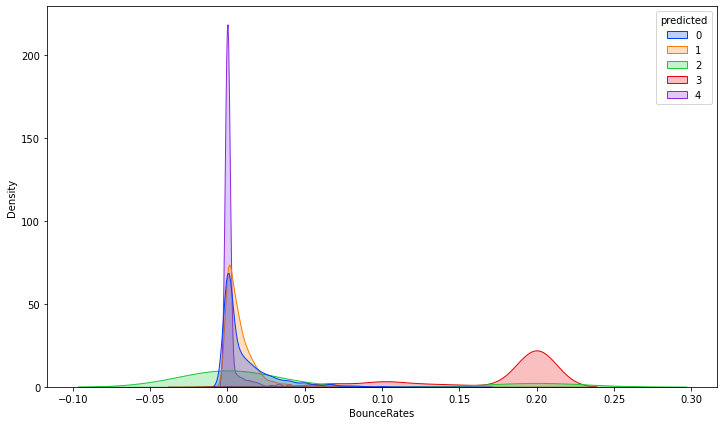

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.kdeplot(data=data,x="BounceRates",hue='predicted',palette="bright",fill=True,common_norm=False)

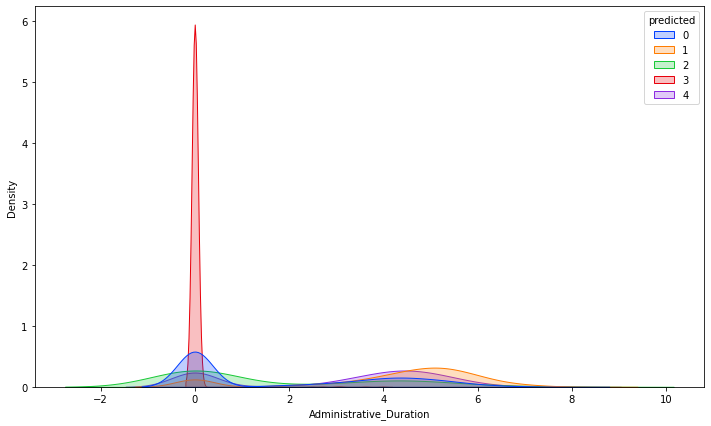

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.kdeplot(data=data,x="Administrative_Duration",hue='predicted',palette="bright",fill=True,common_norm=False)

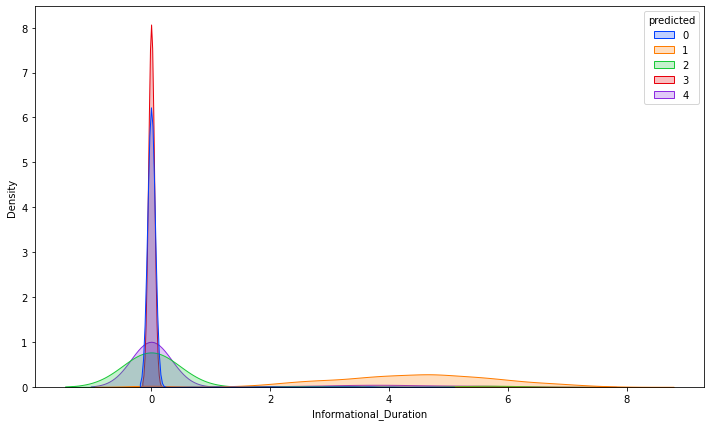

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.kdeplot(data=data,x="Informational_Duration",hue='predicted',palette="bright",fill=True,common_norm=False)

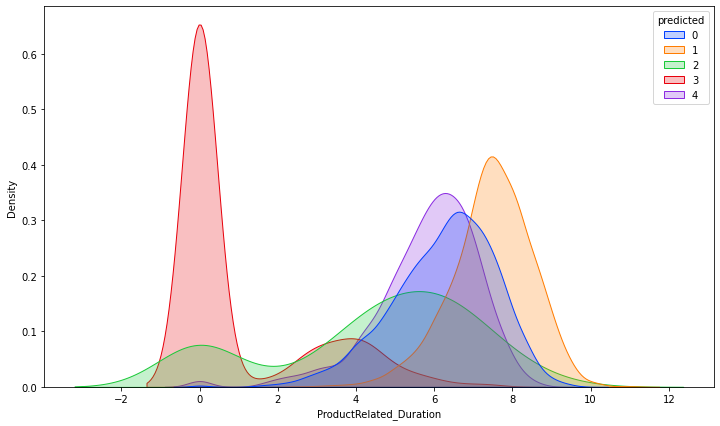

In [ ]:
fig=plt.figure(figsize=(12,7))
sns.kdeplot(data=data,x="ProductRelated_Duration",hue='predicted',palette="bright",fill=True,common_norm=False)